In [1]:
# The Consumer Complaints About Bank Account or Service 

import pandas as pd
import matplotlib.pyplot as pp

In [2]:
#sign-in(API Key) plotly for using graphs

import plotly
import plotly.plotly as py
py.sign_in('yeonjoannechung','D5okstFJz8S0YFvEueIN')      #plotly API key
print(plotly.__version__)                                 #plotly version
plotly.offline.init_notebook_mode()                       #plotly Settings: run at the start

2.1.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
# Read the Consumer Complaints Data from Consumer Financial Protection Bureau(CFPB)

complaintsdata = pd.read_csv("Consumer_Complaints.csv")
complaintsdata.head(3)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100


In [4]:
complaintsdata.shape

(909946, 18)

In [5]:
# Extract 'Bank account or service' information from raw U.S. Consumer Complaints Data 
complaintsdata = complaintsdata.loc[complaintsdata['Product']=='Bank account or service']
complaintsdata.shape

(86207, 18)

In [6]:
complaintsdata.iloc[0,:]

Date received                                                          03/17/2017
Product                                                   Bank account or service
Sub-product                                                      Checking account
Issue                                    Making/receiving payments, sending money
Sub-issue                                                                     NaN
Consumer complaint narrative                                                  NaN
Company public response         Company believes it acted appropriately as aut...
Company                                    UNITED SERVICES AUTOMOBILE ASSOCIATION
State                                                                          WI
ZIP code                                                                    54005
Tags                                                                          NaN
Consumer consent provided?                                                    NaN
Submitted via   

In [7]:
# Summarize # of complaints by State 
complaintsdata_simple = complaintsdata.groupby(['State']).count().sort_values(by='Date received', ascending=False)
complaintsdata_simple.rename(columns={"Date received":"NoofComplaints"}, inplace=True)
complaintsdata_simple = complaintsdata_simple[['NoofComplaints']]
complaintsdata_simple.head(7)

,NoofComplaints
State,
CA,12162
FL,7899
NY,7607
TX,5177
NJ,4074
PA,3698
IL,3610


In [8]:
# using plotly to show # of consumer complaints by U.S. state

# color range
scale = [[0.0, 'rgb(223,221,228)'],
         [0.2, 'rgb(199,199,216)'],
         [0.4, 'rgb(169,170,201)'],
         [0.6, 'rgb(139,135,181)'],
         [0.8, 'rgb(98,88,158)'],
         [1.0, 'rgb(63,20,122)']]

#create a Caption column
complaintsdata_map = complaintsdata_simple.reset_index()
complaintsdata_map['caption'] = complaintsdata_map['State']

mydata = [dict(type='choropleth', colorscale=False,
            locations=complaintsdata_map['State'],
                z=complaintsdata_map['NoofComplaints'].astype(int),
                  locationmode='USA-states',
                  text=complaintsdata_map['caption'],
                  hoverinfo='location+z',
                  marker=dict(line=dict(color='rgb(255,255,255)',width=2)),
                  colorbar=dict(title='U.S. # of consumer complaints'))]

mylayout = dict(title='Number of Consumer Complaints <br />(U.S. Bank Account or Service)',
                geo=dict(scope='USA',
                         projection=dict(type='albers usa'),
                                         showlakes=True,
                                         lakecolor='rgb(95,145,237)'))
fig = dict(data=mydata, layout=mylayout)
py.iplot(fig, validate=False, filename='U.S Consumer Complaints')

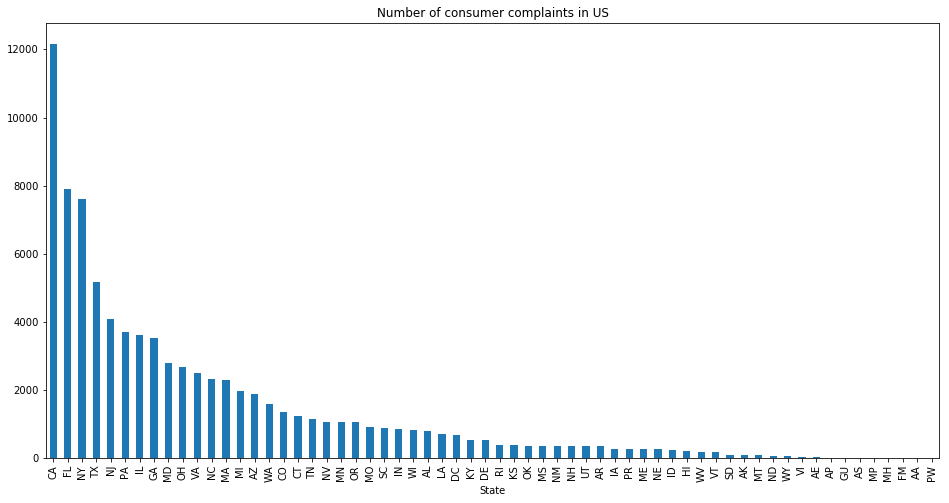

In [9]:
complaintsdata_simple.plot.bar(legend=False, figsize=(16,8), title='Number of consumer complaints in US')
pp.show()

In [10]:
# Q: The “Bank Account or service” consumer complaints 
#       Find top 7 states
#       Collect between 2012 and 2016

# Find the number of complaints of top 7 States 
top7states= complaintsdata_simple.iloc[:7, :0]

top7states = top7states.reset_index()
top7states['State'].values.tolist()

['CA', 'FL', 'NY', 'TX', 'NJ', 'PA', 'IL']

In [11]:
# Extract data before 2017: Exclude 2017 data
complaintsdata['Year'] = pd.to_datetime(complaintsdata['Date received']).apply(lambda x:x.strftime('%Y'))
complaintsdata = complaintsdata[complaintsdata['Year'].astype(int) < 2017]
complaintsdata.shape

(79251, 19)

In [12]:
# Extract Year from 'Data recived' and add 'Year' column
top7data = complaintsdata.loc[complaintsdata['State']
                              .isin(top7states['State'].values.tolist())][['Date received','State']]
top7data['Year'] = pd.to_datetime(top7data['Date received']).apply(lambda x:x.strftime('%Y'))
top7data.head()

,Date received,State,Year
32,06/24/2015,CA,2015
59,03/21/2016,NJ,2016
63,04/24/2013,NY,2013
100,11/22/2014,TX,2014
130,04/27/2012,NY,2012


In [13]:
# Group by State and Year 

top7data_groupby = top7data.groupby(['State', 'Year']).count().reset_index().sort_values(
                        by=['State', 'Year'], ascending=True)
if 'Date received' in top7data_groupby:
    top7data_groupby.rename(columns={'Date received':'NoOfComplaints'}, inplace=True)
top7data_groupby.set_index(['State','Year'])
#top7data_groupby.loc[top7data_groupby['State']=='FL']

top7data_graph = top7data_groupby.pivot_table('NoOfComplaints', ['State'], 'Year')
top7data_graph

Year,2012,2013,2014,2015,2016
State,,,,,
CA,1573,1788,2042,2431,3288
FL,1081,1254,1426,1595,1896
IL,540,515,582,649,1011
NJ,653,693,692,781,950
NY,1210,1120,1252,1525,1912
PA,530,612,647,729,906
TX,652,732,872,1072,1397


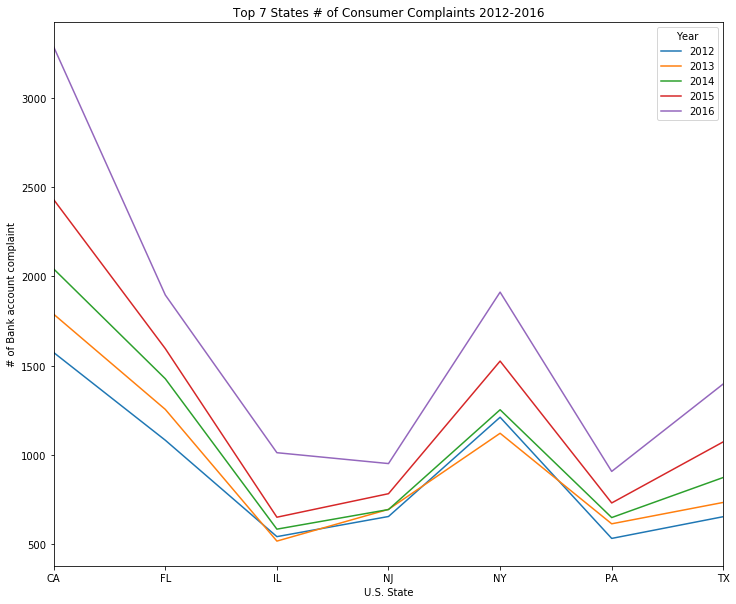

In [14]:
# Q: Compare the number of complaints by year

Top7StatePlot = top7data_graph.plot.line(legend=True,
                                                    figsize=(12,10),
                                                    title='Top 7 States # of Consumer Complaints 2012-2016')
Top7StatePlot.set_ylabel('# of Bank account complaint')
Top7StatePlot.set_xlabel('U.S. State')
pp.show()

In [15]:
# Q: Check the complaint issues by state and find the pattern

# Group by complaints issues
issuedata = complaintsdata[['State','Sub-product','Issue']]
issuedata = issuedata.loc[issuedata['State'].isin(top7states['State'].values.tolist())]
issuedata.head()
issuedata['Issue'].unique()

array(['Account opening, closing, or management',
       'Problems caused by my funds being low', 'Deposits and withdrawals',
       'Making/receiving payments, sending money',
       'Using a debit or ATM card'], dtype=object)

In [16]:
# Group by State and Issue
issuedata = issuedata.groupby(['State','Issue']).count().reset_index()
issuedata.rename(columns={'Sub-product':'NoofComplaints'}, inplace=True)
issuedata.set_index(['State','Issue']).head(10)

NoofComplaints
State Issue                                                   
CA    Account opening, closing, or management             5254
      Deposits and withdrawals                            2886
      Making/receiving payments, sending money             928
      Problems caused by my funds being low               1243
      Using a debit or ATM card                            811
FL    Account opening, closing, or management             3102
      Deposits and withdrawals                            1958
      Making/receiving payments, sending money             665
      Problems caused by my funds being low               1002
      Using a debit or ATM card                            525

In [17]:
# Create a function to compare complaints issues by two states using pie charts

def issuePieChartbyState(state1, state2):
    fig = {
      "data": [
        {
          "values": issuedata[issuedata['State']==state1]['NoofComplaints'],
          "labels": issuedata[issuedata['State']==state1]['Issue'],
          "domain": {"x": [0, .48]},
          "name": state1, "hoverinfo":"label+percent+name",
          "hole": .4, "type": "pie"
        },{
          "values": issuedata[issuedata['State']==state2]['NoofComplaints'],
          "labels": issuedata[issuedata['State']==state2]['Issue'],
          "domain": {"x": [0.52, 1]},
          "name": state2, "hoverinfo":"label+percent+name",
          "hole": .4, "type": "pie"
        }], 
        "layout": { 
            "title": state1 + " and " + state2 + " Consumer Complaint Issues 2012-2016",
            "annotations": [
                {"font": {"size": 20}, "showarrow": False, "text": state1, "x": 0.215, "y": 0.5 },
                {"font": {"size": 20}, "showarrow": False, "text": state2, "x": 0.78, "y": 0.5 }
            ]
        }
    }
    return fig

piefig = issuePieChartbyState('CA', 'FL')
py.iplot(piefig, filename='IssuesbyState')


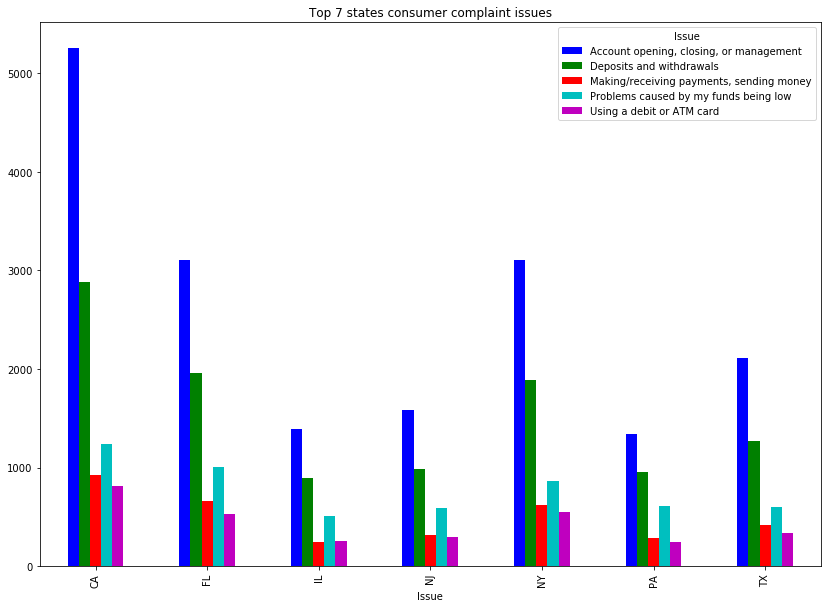

In [18]:
# Make a graph for complaints issues
stateissuedata = issuedata.pivot_table('NoofComplaints', ['State'], 'Issue')
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'g']
caplot = stateissuedata.plot.bar(legend=True, figsize=(14,10), color=colors, 
                                             title="Top 7 states consumer complaint issues")
caplot.set_xlabel('Issue')
pp.show()

In [19]:
# Q: Compare the data with U.S state’s population

# read population data
popdata = pd.read_csv('nst-est2016-popchg2010_2016.csv')
popdata = popdata[['NAME','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','POPESTIMATE2016']]
popdata.head(10)

,NAME,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
0,United States,313998379,316204908,318563456,320896618,323127513
1,Northeast Region,55829059,55988771,56116791,56184737,56209510
2,Midwest Region,67332320,67543948,67726368,67838387,67941429
3,South Region,117299171,118424320,119696311,121039206,122319574
4,West Region,73537829,74247869,75023986,75834288,76657000
5,Alabama,4815960,4829479,4843214,4853875,4863300
6,Alaska,731089,736879,736705,737709,741894
7,Arizona,6549634,6624617,6719993,6817565,6931071
8,Arkansas,2950685,2958663,2966912,2977853,2988248
9,California,38011074,38335203,38680810,38993940,39250017


In [20]:
# Make a function: Find U.S state short name
def findStateAbbrev(statename):
    if statename in us_state_abbrev:
        return us_state_abbrev[statename]

us_state_abbrev = {'California': 'CA','Florida': 'FL','Illinois': 'IL','New Jersey': 'NJ',
                    'New York': 'NY','Pennsylvania': 'PA','Texas': 'TX'}
    
findStateAbbrev('Illinois')

'IL'

In [21]:
popdata['State'] = popdata['NAME'].apply(lambda x:findStateAbbrev(x))
popdata.head(15)

,NAME,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,State
0,United States,313998379,316204908,318563456,320896618,323127513,None
1,Northeast Region,55829059,55988771,56116791,56184737,56209510,None
2,Midwest Region,67332320,67543948,67726368,67838387,67941429,None
3,South Region,117299171,118424320,119696311,121039206,122319574,None
4,West Region,73537829,74247869,75023986,75834288,76657000,None
5,Alabama,4815960,4829479,4843214,4853875,4863300,None
6,Alaska,731089,736879,736705,737709,741894,None
7,Arizona,6549634,6624617,6719993,6817565,6931071,None
8,Arkansas,2950685,2958663,2966912,2977853,2988248,None
9,California,38011074,38335203,38680810,38993940,39250017,CA


In [22]:
top7pop = popdata.loc[popdata['State'].isin(top7states['State'].values.tolist())].set_index(['State'])
top7pop

,NAME,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016
State,,,,,,
CA,California,38011074,38335203,38680810,38993940,39250017
FL,Florida,19344156,19582022,19888741,20244914,20612439
IL,Illinois,12870798,12879505,12867544,12839047,12801539
NJ,New Jersey,8873211,8899162,8925001,8935421,8944469
NY,New York,19602769,19673546,19718515,19747183,19745289
PA,Pennsylvania,12771854,12781338,12790565,12791904,12784227
TX,Texas,26071655,26473525,26944751,27429639,27862596


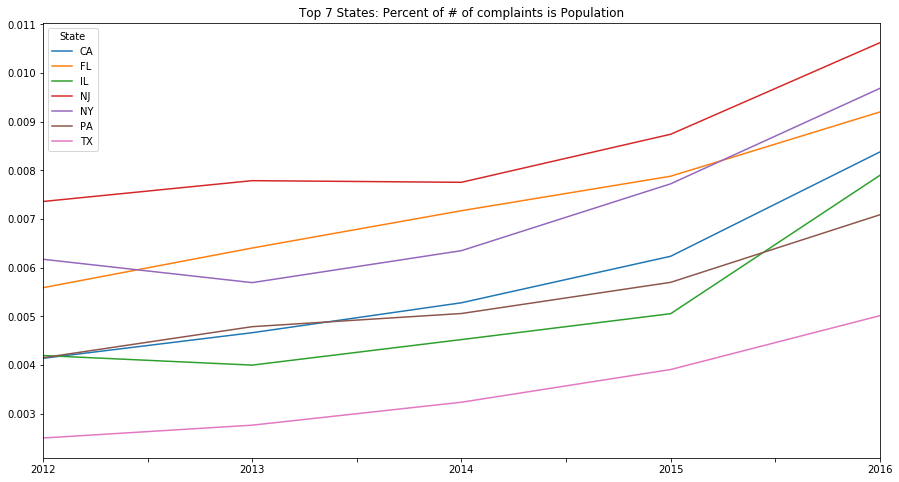

In [23]:
# Q: Compare the data to U.S state’s population

# Make a function: calcuate Percent of (# of complaints) with (U.S. State Population)
def calculatePercent(data, startyear, endyear):
    data_percent = data
    for eachyear in range(startyear, endyear+1):
        data_percent[str(eachyear) + 'Percent'] = 100 * data[str(eachyear)] / top7pop['POPESTIMATE' + str(eachyear)]
    return data_percent

top7data_percent = calculatePercent(top7data_graph, 2012, 2016)
top7data_percent =top7data_percent.drop(['2012','2013','2014','2015','2016'], axis=1)
top7data_percent.columns =['2012','2013','2014','2015','2016']

ax = top7data_percent.transpose().plot(figsize=(15,8))
ax.set_title('Top 7 States: Percent of # of complaints is Population')
pp.show()

In [24]:
# Q: Find Top 5 highest number of complaints companies in CA, check the pattern

CAcomplaint = complaintsdata.loc[complaintsdata['State']=='CA']
CAcomplaint = CAcomplaint.groupby(['Company']).count().sort_values(['Product'], ascending=False).head(5)
CAcomplaint = CAcomplaint['Product'].reset_index()
CAcomplaint['Company']

0    BANK OF AMERICA, NATIONAL ASSOCIATION
1                    WELLS FARGO & COMPANY
2                     JPMORGAN CHASE & CO.
3                             U.S. BANCORP
4                           CITIBANK, N.A.
Name: Company, dtype: object

In [25]:
CAcomplaint_top5 = complaintsdata.loc[(complaintsdata['State']=='CA') & 
                                               (complaintsdata['Company'].isin(CAcomplaint['Company']))]
CAcomplaint_top5.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year
196,05/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,94539,NaN,NaN,Phone,05/30/2013,Closed with monetary relief,Yes,No,418678,2013
378,10/28/2015,Bank account or service,Checking account,"Making/receiving payments, sending money",NaN,NaN,Company chooses not to provide a public response,WELLS FARGO & COMPANY,CA,94920,"Older American, Servicemember",NaN,Phone,10/28/2015,Closed with explanation,Yes,No,1630052,2015
408,11/07/2014,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,NaN,NaN,JPMORGAN CHASE & CO.,CA,92377,NaN,NaN,Referral,11/10/2014,Closed with explanation,Yes,No,1108129,2014
564,02/18/2016,Bank account or service,Checking account,"Making/receiving payments, sending money",NaN,NaN,Company chooses not to provide a public response,U.S. BANCORP,CA,93536,NaN,Consent not provided,Web,02/18/2016,Closed with non-monetary relief,Yes,No,1792341,2016
602,02/02/2015,Bank account or service,Other bank product/service,"Account opening, closing, or management",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,94558,NaN,NaN,Postal mail,02/02/2015,Closed with explanation,Yes,No,1220070,2015


In [26]:
# CA: top 5 highest number of complaints companies
CAcomplaint_company = CAcomplaint_top5.groupby(['Company', 'Year']).count().reset_index()
CAcomplaint_company
CAcomplaint_g = CAcomplaint_company.pivot_table('Date received', ['Company'], 'Year')
CAcomplaint_g = CAcomplaint_g #.iloc[:, :5]
CAcomplaint_g

Year,2012,2013,2014,2015,2016
Company,,,,,
"BANK OF AMERICA, NATIONAL ASSOCIATION",415,434,519,539,717
"CITIBANK, N.A.",69,80,104,138,419
JPMORGAN CHASE & CO.,255,280,295,360,540
U.S. BANCORP,117,152,169,200,227
WELLS FARGO & COMPANY,416,451,437,452,578


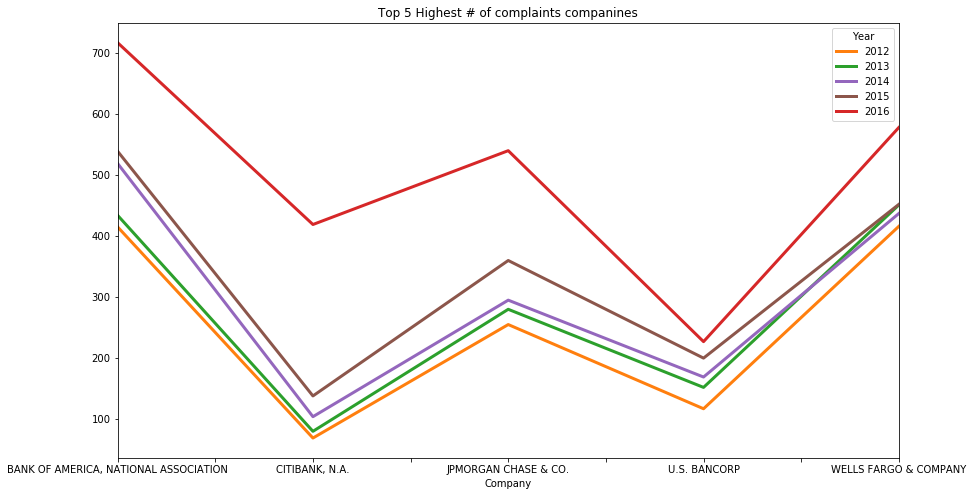

In [27]:
# Make a graph: CA top 5 highest number of complaints companies
CAcomplaint_g.plot(legend=True,figsize=(14,8), linewidth=3, 
                   color={'C0', 'C1', 'C2', 'C3', 'C4', 'C5'}, 
                   title='Top 5 Highest # of complaints companines')
pp.show()

In [28]:
# Q: Check the trend of “submitted via” and predict

# Extract Top 7 states data with 'Submitted via' and make 'Year' column
complaintsdata_submittedby = complaintsdata.loc[:,['Date received','State', 'Submitted via']]
complaintsdata_submittedby = complaintsdata_submittedby.loc[complaintsdata_submittedby['State']
                                                                    .isin(top7states['State'].values.tolist())]
top7data_submittedby = complaintsdata_submittedby
top7data_submittedby['Year'] = pd.to_datetime(complaintsdata_submittedby['Date received']).apply(
                                                                    lambda x:x.strftime('%Y'))
top7data_submittedby.head()

,Date received,State,Submitted via,Year
32,06/24/2015,CA,Referral,2015
59,03/21/2016,NJ,Web,2016
63,04/24/2013,NY,Web,2013
100,11/22/2014,TX,Web,2014
130,04/27/2012,NY,Referral,2012


In [29]:
# data cleaning: remove 2017 data and Top 5 'Submitted via'
top7data_submittedby = top7data_submittedby.loc[top7data_submittedby['Year'].astype('int') < 2017 ]
top7data_submittedby = top7data_submittedby[top7data_submittedby['Submitted via'] != 'Email' ]
top7data_submittedby.groupby(['Submitted via']).count()

,Date received,State,Year
Submitted via,,,
Fax,538,538,538
Phone,5681,5681,5681
Postal mail,1797,1797,1797
Referral,13763,13763,13763
Web,18805,18805,18805


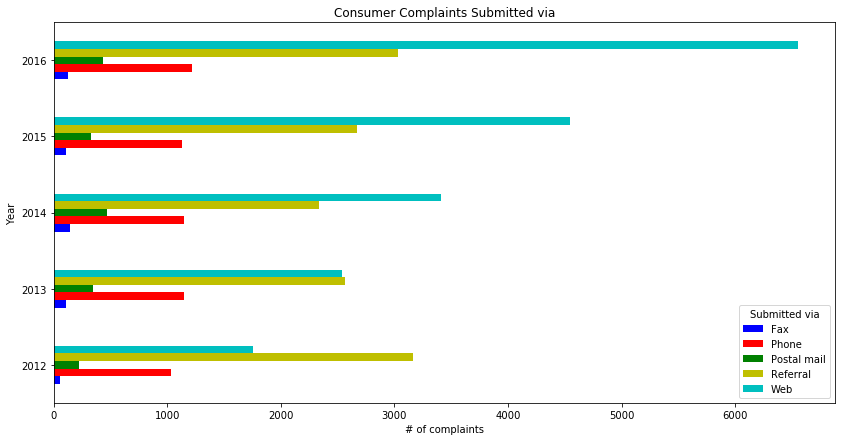

In [30]:
# Make last 5 years 'Submitted via' graph
top7data_submittedby_group = top7data_submittedby.groupby(['Submitted via','Year']).count()
top7data_submittedby_group_graph = top7data_submittedby_group.pivot_table('Date received', ['Year'], 'Submitted via')
colors = ['b', 'r', 'g', 'y', 'c']
submitplot = top7data_submittedby_group_graph.plot.barh(legend=True, figsize=(14,7), 
                                                        color=colors, title="Consumer Complaints Submitted via")
submitplot.set_ylabel('Year')
submitplot.set_xlabel('# of complaints')
pp.show()
